1. Nsight methodology for hierarchical Roofline
    - foundataion for Nsight automation; NCU now is only HBM based
2. ERT and precision Roofline
    - C++ templated version
    - TC roof and mixed-prec roof exploration
3. Time-integrated Roofline
    - new 3D/2D variant
    - show launch overhead
    - algorithm comparison, TF non-determinism 
4. conv2d and LSTM (tf-ker)
    - LSTM less compute intensive than conv2d??
    - TF1 vs TF2 vs TF2+XLA
    - TF vs PT (speed)
    - FP32 vs FP16 (effect of AMP)
    - FW/BW/Opt, Kernel Size, other params...
    - launch time - new Roofline variant
    - algorithm determinism, TF vs PT
5. real-life applications (climseg)
    - TF1; no TF2 code, and no XLA
    - TF: FP32 AMP vs. FP32 w/o AMP vs. FP16 manual 
    - PT: FP32 with AMP O0, O1, O2
    - PT: AdamW vs Adam; TF: LARC-Adam vs Adam; speed, convergence
    - FW/BW/Opt, 0-AI kernels, instr roofline?
    - TF FP32 AMP vs PT AMP O1
    - TF non-determinism 
        - https://github.com/NVIDIA/tensorflow-determinism
        - sources of non-determinism:
        - TF auto-tuning of cuDNN convolution algorithms (see multi-algo note)	 
        - cuDNN convolution backprop to weight gradients	 
        - cuDNN convolution backprop to data gradients	 
        - cuDNN max-pooling backprop	 
        - cuDNN CTC loss	 
        - tf.nn.bias_add backprop (see XLA note)	 
        - XLA reductions on GPU	 
        - Fused softmax/cross-entropy ops backprop
    - TC usage, mixed-prec roofline
    - launch overhead, cross-node comm.
    - HBM Roofline only?? hierarchical 
    - batch 2 vs 1, with/without AMP

NCU 2019 special version;
PyCUDA;
TF 1.15.0, CUDA 10.0.130, but NCU from 2019 
PT latest, CUDA 10.2.89
https://www.tensorflow.org/guide/migrate#automatic_conversion_script
network design:  number of layers, kernel sizes for each layer, batch norm, no dropout, relu, optimizer, learning rate, batch size, hyper-params in optim alpha beta, horovod, validation, early stopping? 
convergence rate and speed, 
FW/BW/Opt not separate in TF, graph based exec

## some notes
1. L1, L2 and HBM are very close together; PT, some kernels have higher bandwidth (opt)
2. similar number of kernels generated for TF and PT (total, fw and bw)
3. TF has bw and opt in bw, and PT has them separate
4. 0-AI kernels: 300 fw, 600 bw, 0 opt for PT, and 300 fw, 1800 bw for TF
5. TF: FP32 w/o AMP can't run with batch=2 (OOM errors); PT can
6. TF: FP32 w/AMP has similar performance as FP16 (w/ or w/o AMP)
7. Both TF and PT: good TC usage once AMP is enabled, 86% of peak (1300MHz x 1024 x 80 is not 125 TFLOP/s !!!)
8. PT: Adam, AdamW, LARC, not much difference, except LARC opt (very few kernels)
9. TF FP32 w/ AMP vs PT FP32 w/ AMP O1 (more analysis)
10. batch2 generates more kernels than batch1, but not doubled
11. count vs time vs flops, some kernels have low time/flops, but many of them!

Total: 114 figures for TF and 159 figures for PT

## more notes

1. new set of metrics: https://github.com/cyanguwa/DeepLearningProfiling/blob/master/README.md
2. BasicKernels has cnn2d and rnn1d with TF1, TF2 and PT. w/ and w/o XLA for TF1 and TF2. No XLA for PT.
3. not mass run BasicKernels yet, but tested with some scripts; need to select a set of parameters!
4. both results and analysis for TF and PT versions of climateseg
5. tf-determinism for TF climateseg: https://github.com/NVIDIA/tensorflow-determinism  
    covers 99% of algorithm change, not 100%, but has worked well for this benchmark  
    so we can run metrics in different runs, to avoid crashes or hangs  
    selects *a* algorithm, may not be the optimal  
    however, algorithms chosen under profiling conditions are not optimal either

In [13]:
tftags=['fp16-batch2-fw-amp', 'fp16-batch2-fw-noamp', \
 'fp16-batch2-fwbw-amp', 'fp16-batch2-fwbw-noamp', \
 'fp32-batch1-fw-amp', 'fp32-batch1-fw-noamp', \
 'fp32-batch1-fwbw-amp', 'fp32-batch1-fwbw-noamp', \
 'fp32-batch2-fw-amp', 'fp32-batch2-fwbw-amp']
pttags=['fp32-O0-Adam-bw', 'fp32-O0-Adam-fw', 'fp32-O0-Adam-opt', \
        'fp32-O1-Adam-bw', 'fp32-O1-Adam-fw', 'fp32-O1-Adam-opt', \
        'fp32-O1-AdamW-bw', 'fp32-O1-AdamW-fw', 'fp32-O1-AdamW-opt', \
        'fp32-O1-LAMB-bw', 'fp32-O1-LAMB-fw', 'fp32-O1-LAMB-opt', \
        'fp32-O2-Adam-bw', 'fp32-O2-Adam-fw', 'fp32-O2-Adam-opt']
norms=['count','time','flops','tcflops'] 
flags=['HBM','L2','L1']
tfpath='/Users/cjyang/Downloads/DLcomp/NEW/figures-TF'
ptpath='/Users/cjyang/Downloads/DLcomp/NEW/figures-PT'


## TF fp32-batch2-fw-amp vs. PT fp32-O1-Adam-fw

/Users/cjyang/Downloads/DLcomp/NEW/figures-TF/fp32-batch2-fw-amp-count-HBM.png


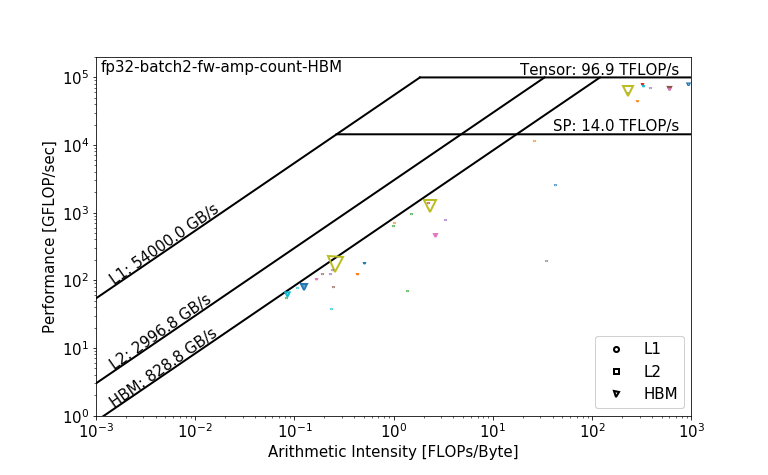

/Users/cjyang/Downloads/DLcomp/NEW/figures-PT/fp32-O1-Adam-fw-count-HBM.png


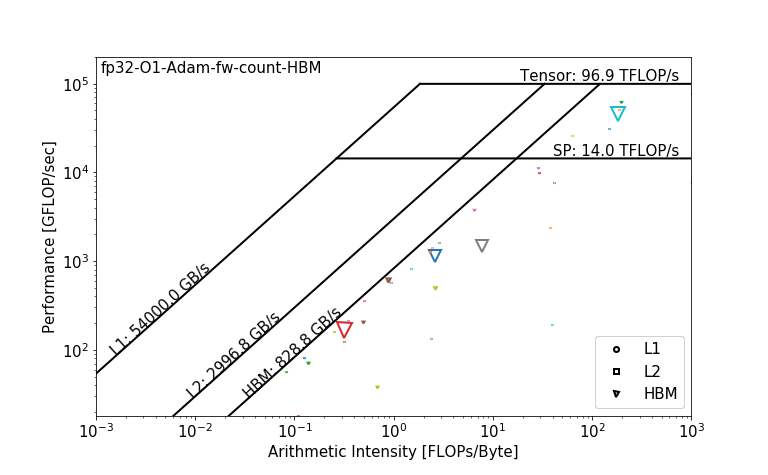

/Users/cjyang/Downloads/DLcomp/NEW/figures-TF/fp32-batch2-fw-amp-time-HBM.png


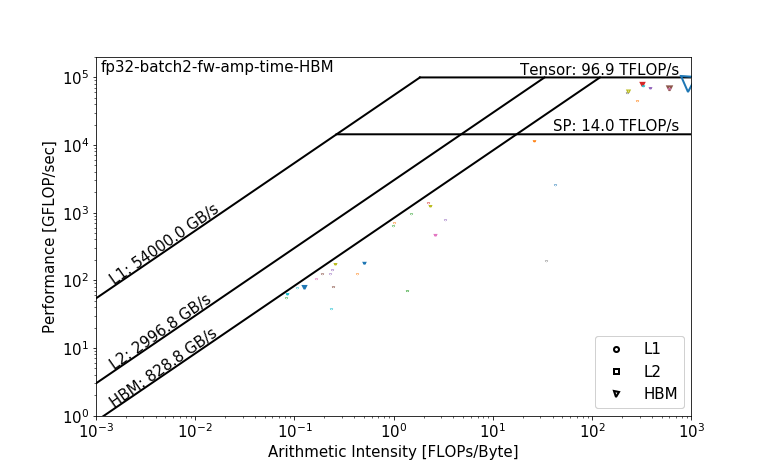

/Users/cjyang/Downloads/DLcomp/NEW/figures-PT/fp32-O1-Adam-fw-time-HBM.png


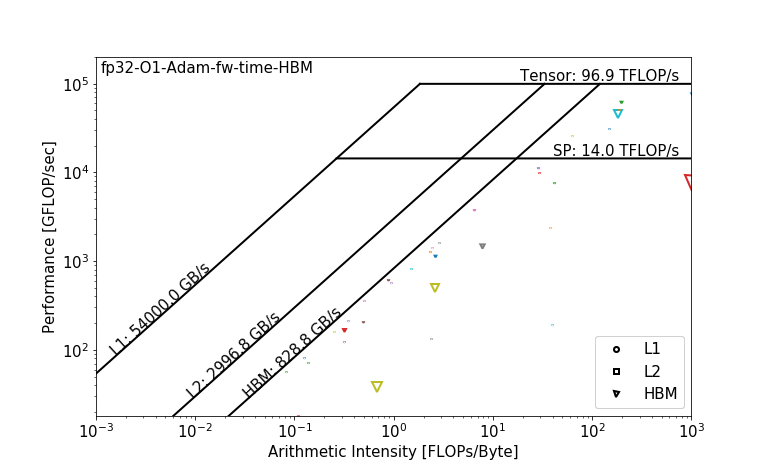

/Users/cjyang/Downloads/DLcomp/NEW/figures-TF/fp32-batch2-fw-amp-flops-HBM.png


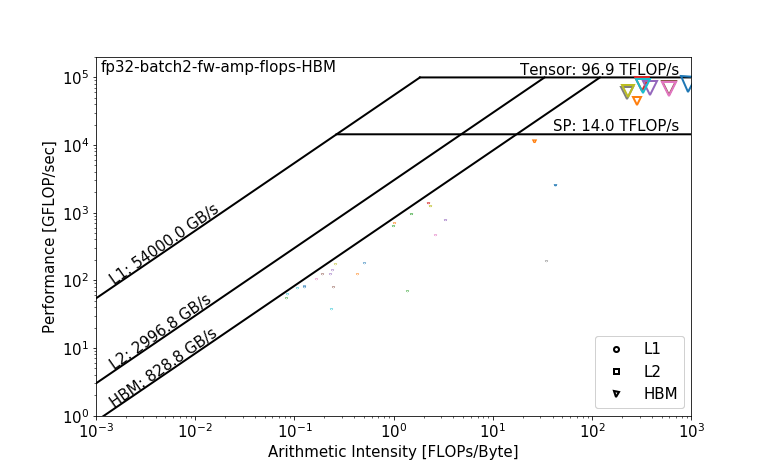

/Users/cjyang/Downloads/DLcomp/NEW/figures-PT/fp32-O1-Adam-fw-flops-HBM.png


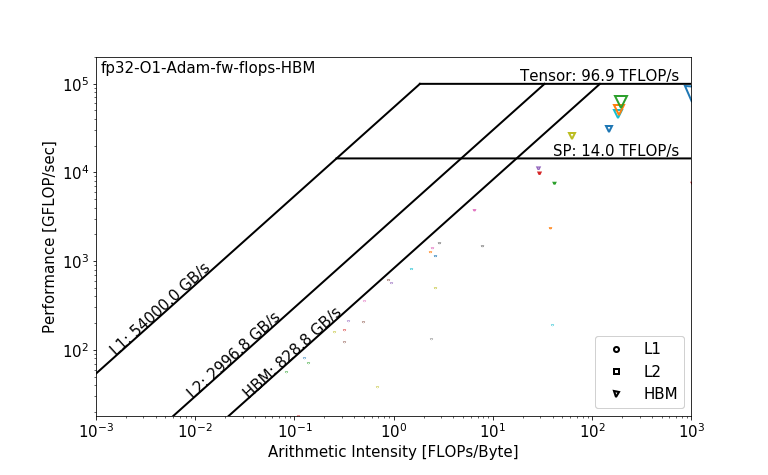

/Users/cjyang/Downloads/DLcomp/NEW/figures-TF/fp32-batch2-fw-amp-tcflops-HBM.png


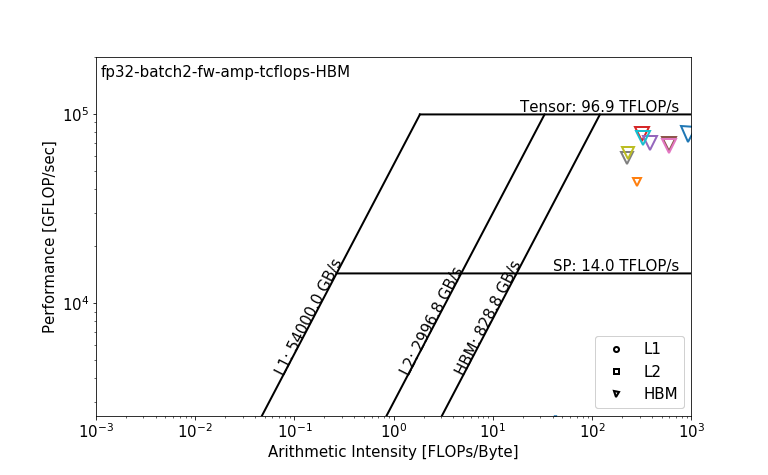

/Users/cjyang/Downloads/DLcomp/NEW/figures-PT/fp32-O1-Adam-fw-tcflops-HBM.png


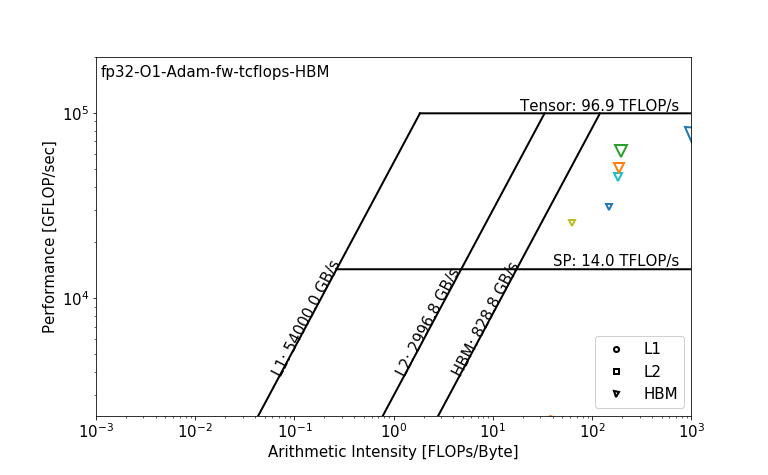

In [23]:
import os
import matplotlib.pyplot as plt
from IPython.display import Image

for norm in norms:
    tftag='fp32-batch2-fw-amp'
    name='-'.join([tftag,norm,'HBM'])+'.png'
    file=os.path.join(tfpath,name)
    print(file)
    display(Image(filename=file))
    pttag='fp32-O1-Adam-fw'
    name='-'.join([pttag,norm,'HBM'])+'.png'
    file=os.path.join(ptpath,name)
    print(file)
    display(Image(filename=file))
    

## TF fp32-batch2-bw-amp vs. PT fp32-O1-Adam-bw

/Users/cjyang/Downloads/DLcomp/NEW/figures-TF/fp32-batch2-bw-amp-count-HBM.png


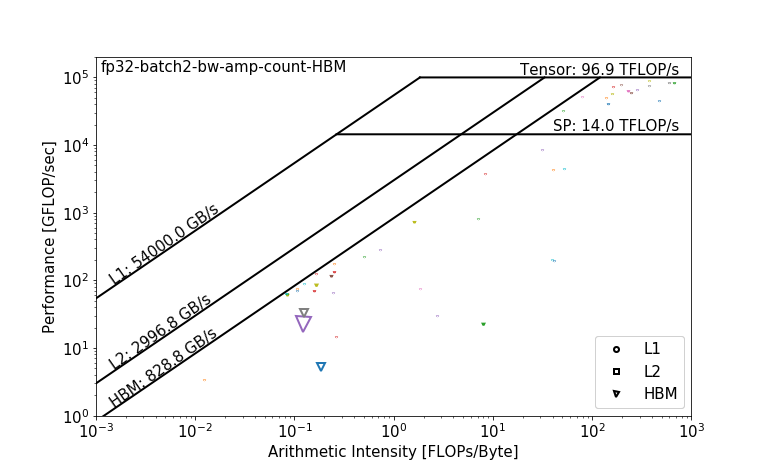

/Users/cjyang/Downloads/DLcomp/NEW/figures-PT/fp32-O1-Adam-bw-count-HBM.png


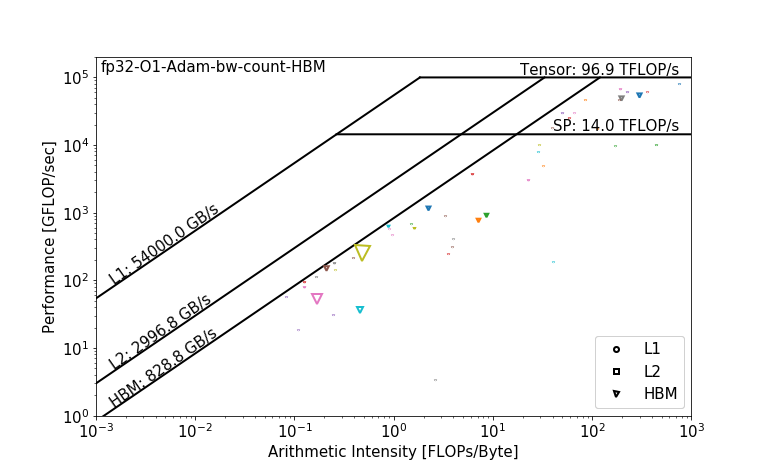

/Users/cjyang/Downloads/DLcomp/NEW/figures-PT/fp32-O1-Adam-opt-count-HBM.png


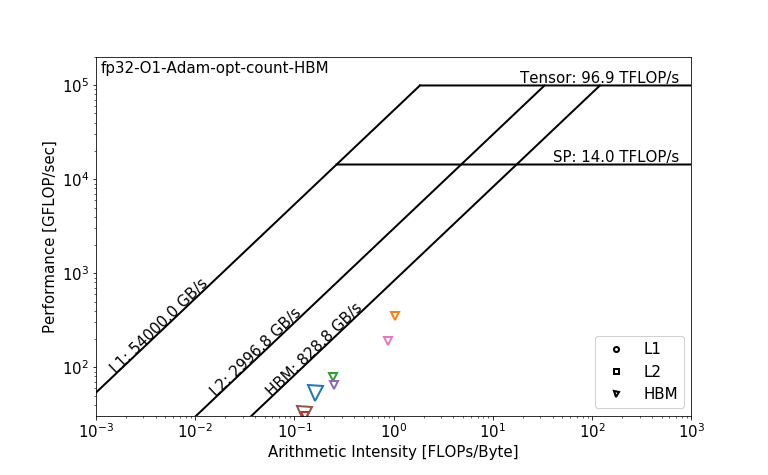

/Users/cjyang/Downloads/DLcomp/NEW/figures-TF/fp32-batch2-bw-amp-time-HBM.png


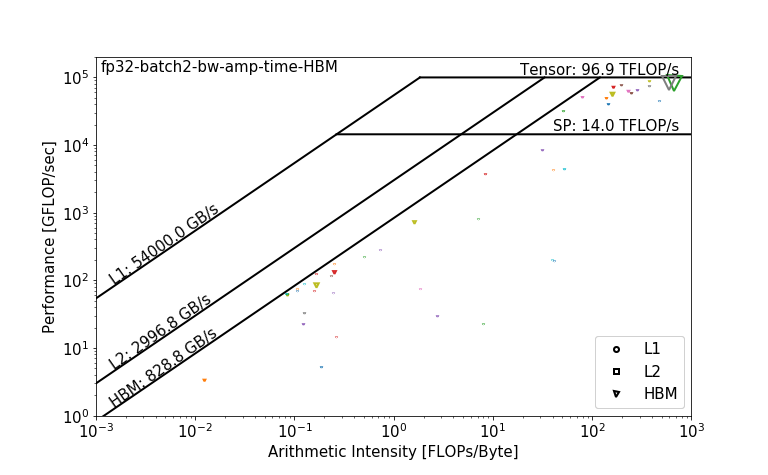

/Users/cjyang/Downloads/DLcomp/NEW/figures-PT/fp32-O1-Adam-bw-time-HBM.png


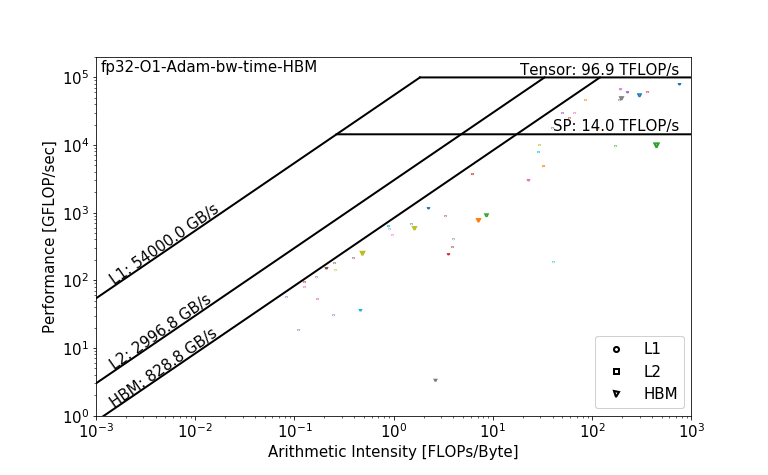

/Users/cjyang/Downloads/DLcomp/NEW/figures-PT/fp32-O1-Adam-opt-time-HBM.png


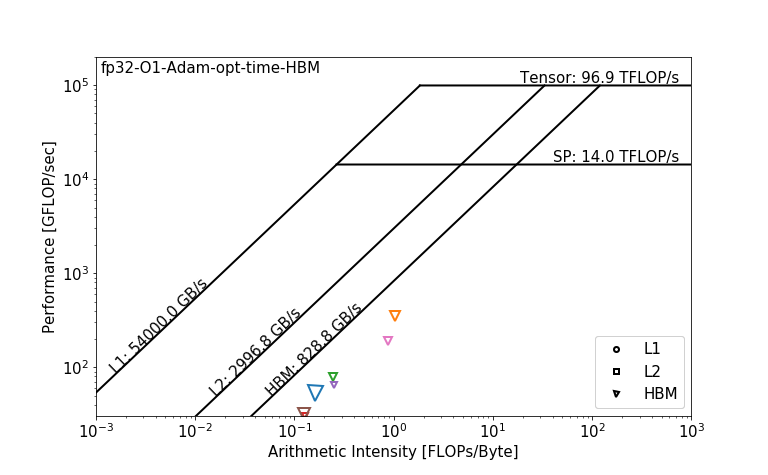

/Users/cjyang/Downloads/DLcomp/NEW/figures-TF/fp32-batch2-bw-amp-flops-HBM.png


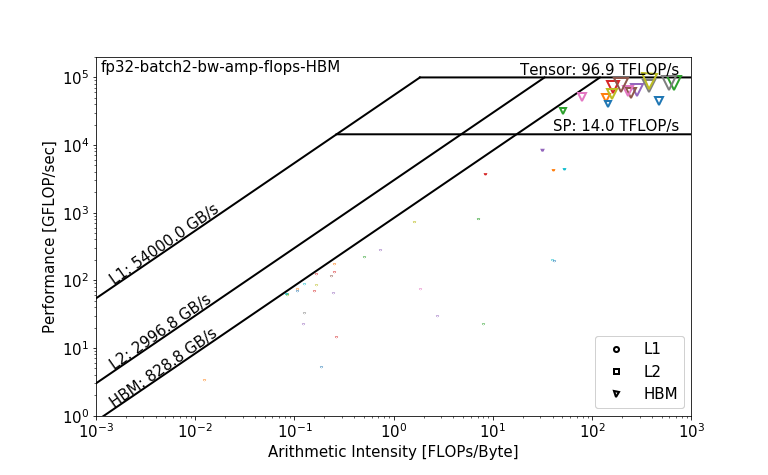

/Users/cjyang/Downloads/DLcomp/NEW/figures-PT/fp32-O1-Adam-bw-flops-HBM.png


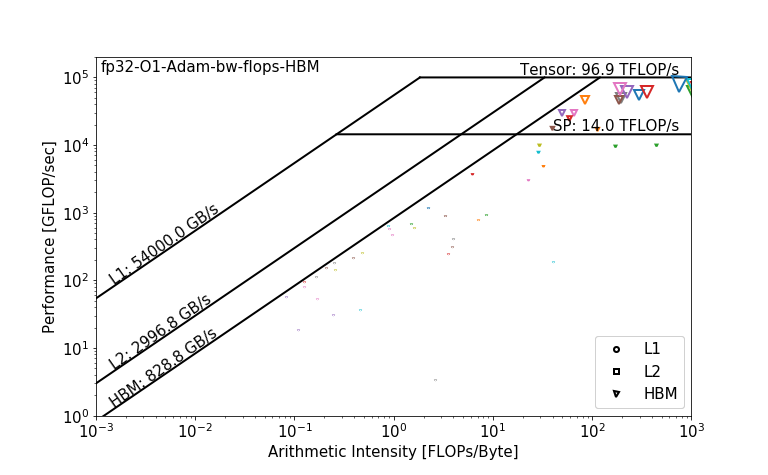

/Users/cjyang/Downloads/DLcomp/NEW/figures-PT/fp32-O1-Adam-opt-flops-HBM.png


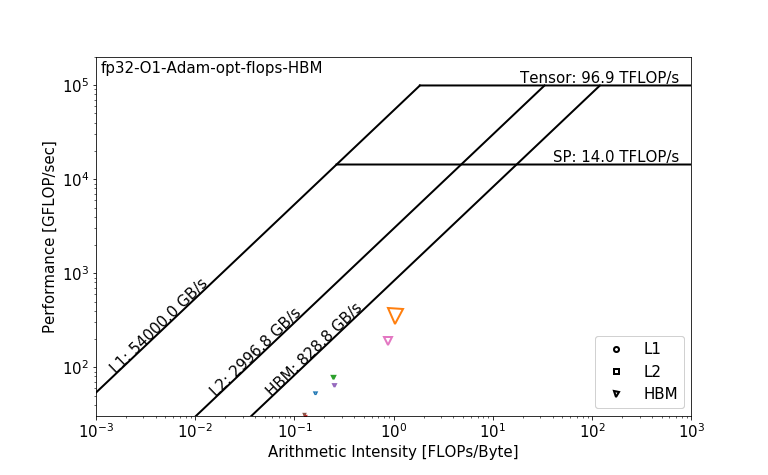

/Users/cjyang/Downloads/DLcomp/NEW/figures-TF/fp32-batch2-bw-amp-tcflops-HBM.png


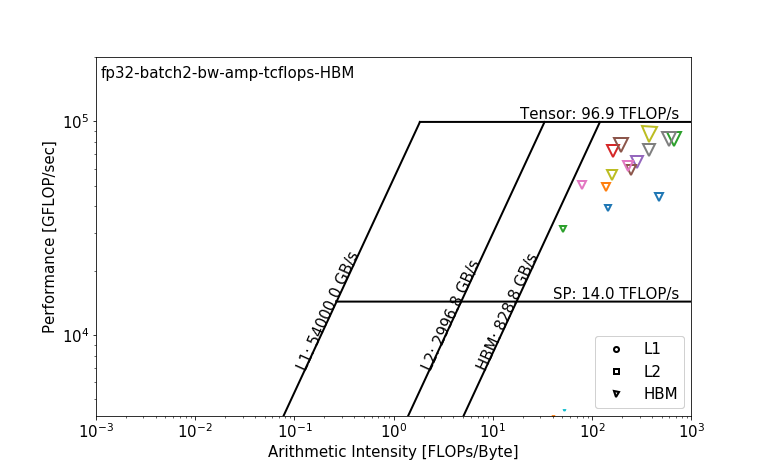

/Users/cjyang/Downloads/DLcomp/NEW/figures-PT/fp32-O1-Adam-bw-tcflops-HBM.png


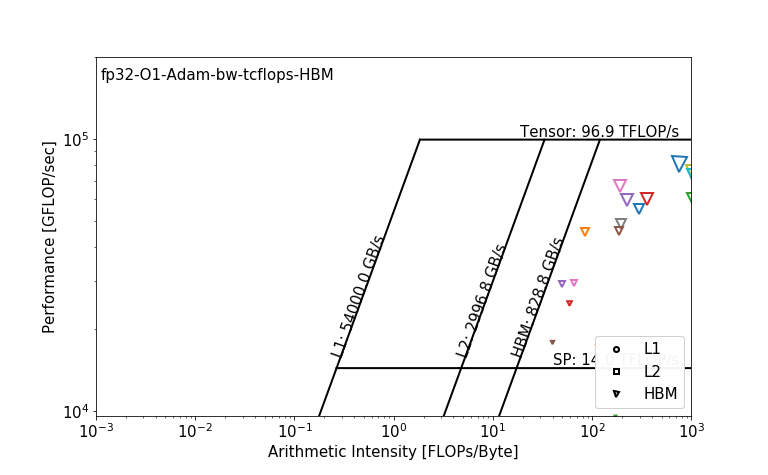

/Users/cjyang/Downloads/DLcomp/NEW/figures-PT/fp32-O1-Adam-opt-tcflops-HBM.png


FileNotFoundError: [Errno 2] No such file or directory: '/Users/cjyang/Downloads/DLcomp/NEW/figures-PT/fp32-O1-Adam-opt-tcflops-HBM.png'

In [24]:
import os
import matplotlib.pyplot as plt
from IPython.display import Image

for norm in norms:
    tftag='fp32-batch2-bw-amp'
    name='-'.join([tftag,norm,'HBM'])+'.png'
    file=os.path.join(tfpath,name)
    print(file)
    display(Image(filename=file))
    pttags=['fp32-O1-Adam-bw','fp32-O1-Adam-opt']
    for pttag in pttags:
        name='-'.join([pttag,norm,'HBM'])+'.png'
        file=os.path.join(ptpath,name)
        print(file)
        display(Image(filename=file))
    

In [16]:
%ls /Users/cjyang/Downloads/DLcomp/NEW/figures-TF/fp16-batch2-fw-amp-count-HBM.png

/Users/cjyang/Downloads/DLcomp/NEW/figures-TF/fp16-batch2-fw-amp-count-HBM.png
